In [1]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df=pd.read_csv("AirPassengers.csv")

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
from statsmodels.tsa.stattools import kpss

In [6]:
import plotly.express as px

In [7]:

#df.set_index('Date',inplace=True)
df.Date=pd.to_datetime(df.Month)

series = df.loc[:, '#Passengers'].values
fig = px.line(df, x='Month', y='#Passengers')
fig.show()

<ipython-input-7-04f41fda91a9>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Date=pd.to_datetime(df.Month)


In [8]:
kpsstest= kpss(series, regression='c')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [9]:
kpss_output=pd.Series(kpsstest[0:3], index=['Test Statistical','p-value','Lags Used'])
for key,value in kpsstest[3].items():
  kpss_output['Critical Value (%s)' %key]=value
print(kpss_output)

Test Statistical          1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [10]:
df['rolling_mean'] = df['#Passengers'].rolling(window=12).mean()
df['rolling_std'] = df['#Passengers'].rolling(window=12).std()

In [11]:
df['rolling_mean']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
139    463.333333
140    467.083333
141    471.583333
142    473.916667
143    476.166667
Name: rolling_mean, Length: 144, dtype: float64

In [12]:
df['rolling_std']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
139    83.630500
140    84.617276
141    82.541954
142    79.502382
143    77.737125
Name: rolling_std, Length: 144, dtype: float64

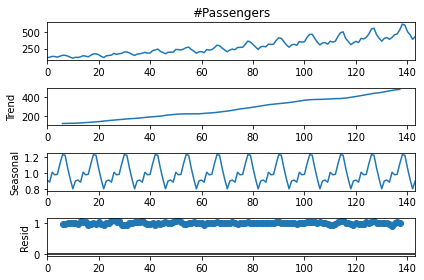

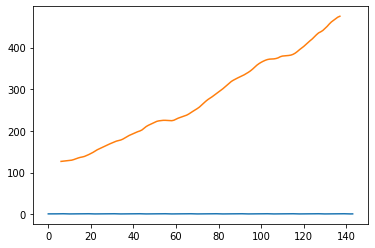

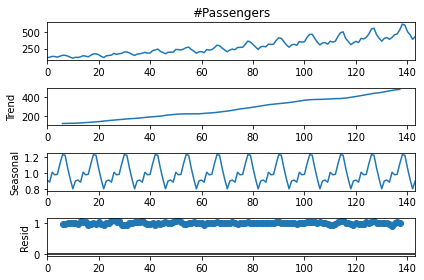

In [13]:
result=seasonal_decompose(df['#Passengers'],model='multiplicable',period=12)
result.seasonal.plot()
result.trend.plot()
result.plot()